In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')













In [2]:
df = pd.read_csv('/home/karthik/smart-city-analytics/data/processed/features.csv', index_col='Timestamp', parse_dates=True)
print('Dataset Shape:', df.shape)
print('Columns:', list(df.columns))

Dataset Shape: (4998, 22)
Columns: ['Latitude', 'Longitude', 'VehicleCount', 'AverageSpeed', 'Occupancy', 'TrafficLightState', 'WeatherCondition', 'AccidentReport', 'SentimentScore', 'RideSharingDemand', 'ParkingAvailability', 'EmissionLevels', 'EnergyConsumption', 'TrafficCondition', 'Hour', 'DayOfWeek', 'IsWeekend', 'RushHour', 'VehicleCount_lag1', 'AverageSpeed_lag1', 'VehicleCount_rolling_mean', 'Congestion']


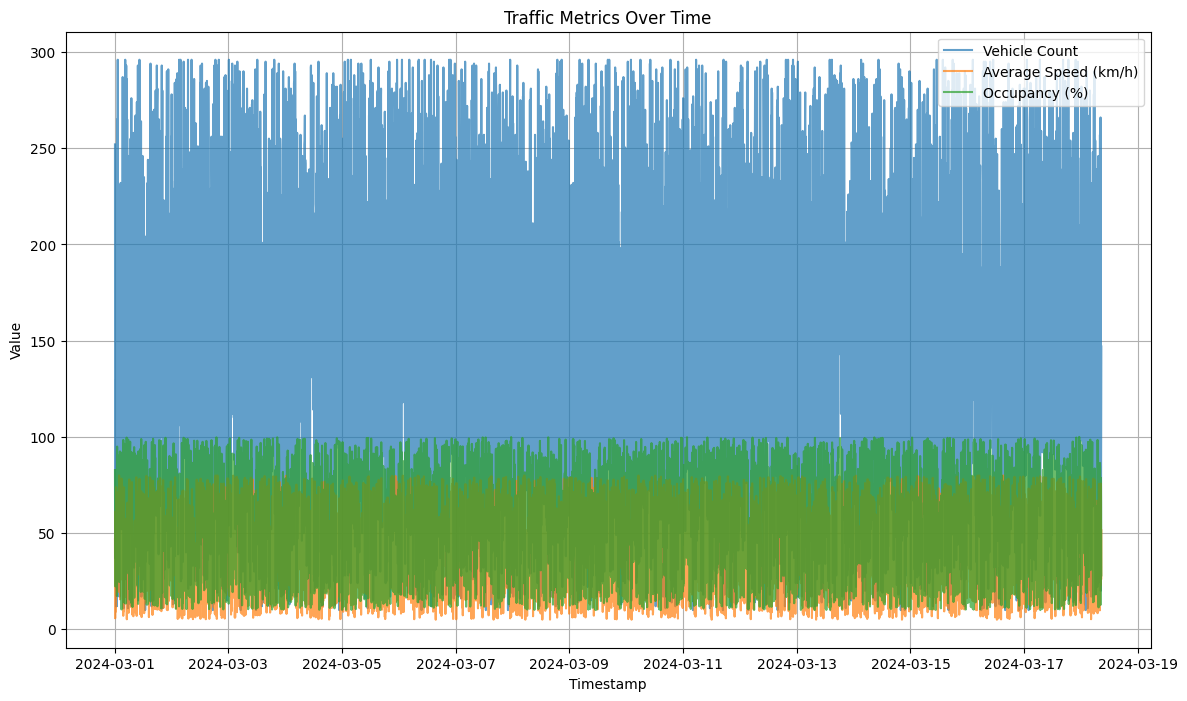

Insight: High vehicle counts often correspond to low speeds and high occupancy, indicating congestion periods.


In [3]:
plt.figure(figsize=(14, 8))
plt.plot(df['VehicleCount'], label='Vehicle Count', alpha=0.7)
plt.plot(df['AverageSpeed'], label='Average Speed (km/h)', alpha=0.7)
plt.plot(df['Occupancy'], label='Occupancy (%)', alpha=0.7)
plt.title('Traffic Metrics Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
print('Insight: High vehicle counts often correspond to low speeds and high occupancy, indicating congestion periods.')

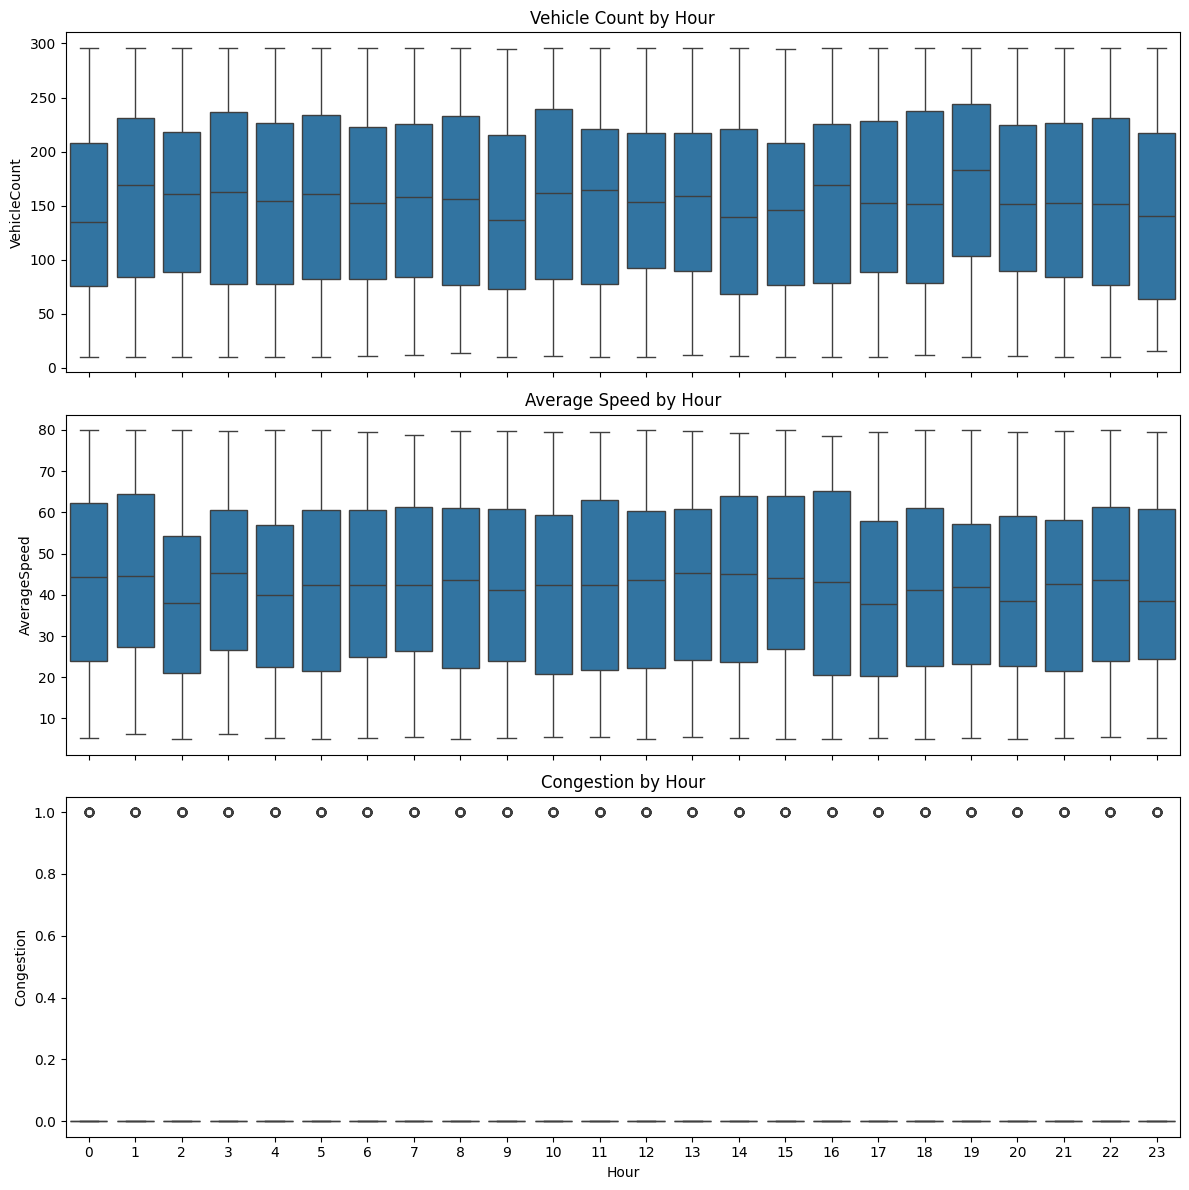

Insight: Peak congestion occurs around hour 8, with high vehicle counts and low speeds.


In [4]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
sns.boxplot(x='Hour', y='VehicleCount', data=df, ax=axes[0])
axes[0].set_title('Vehicle Count by Hour')
sns.boxplot(x='Hour', y='AverageSpeed', data=df, ax=axes[1])
axes[1].set_title('Average Speed by Hour')
sns.boxplot(x='Hour', y='Congestion', data=df, ax=axes[2])
axes[2].set_title('Congestion by Hour')
plt.tight_layout()
plt.show()
peak_hours = df.groupby('Hour')['Congestion'].mean().idxmax()
print(f'Insight: Peak congestion occurs around hour {peak_hours}, with high vehicle counts and low speeds.')

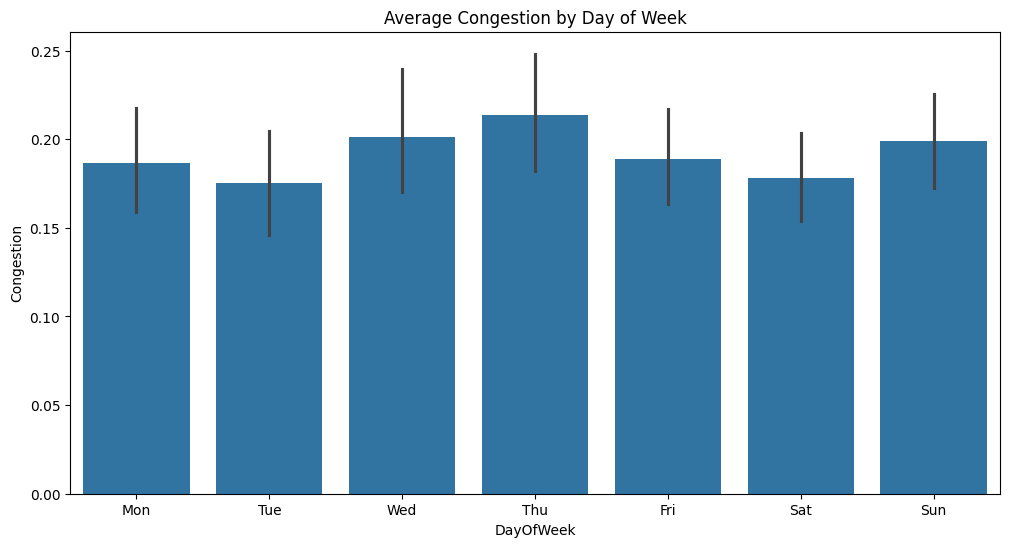

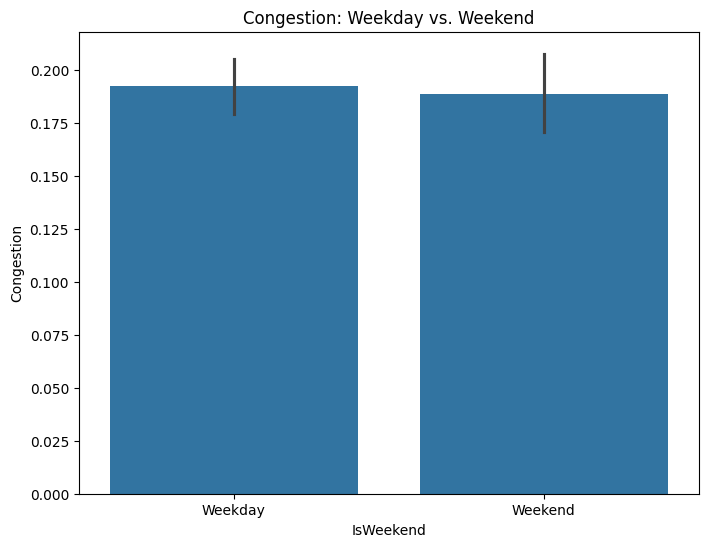

Insight: Congestion is higher on weekdays compared to weekends.


In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Congestion', data=df)
plt.title('Average Congestion by Day of Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
plt.figure(figsize=(8, 6))
sns.barplot(x='IsWeekend', y='Congestion', data=df)
plt.title('Congestion: Weekday vs. Weekend')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()
weekend_congestion = df.groupby('IsWeekend')['Congestion'].mean()
print('Insight: Congestion is', 'higher' if weekend_congestion[0] > weekend_congestion[1] else 'lower', 'on weekdays compared to weekends.')


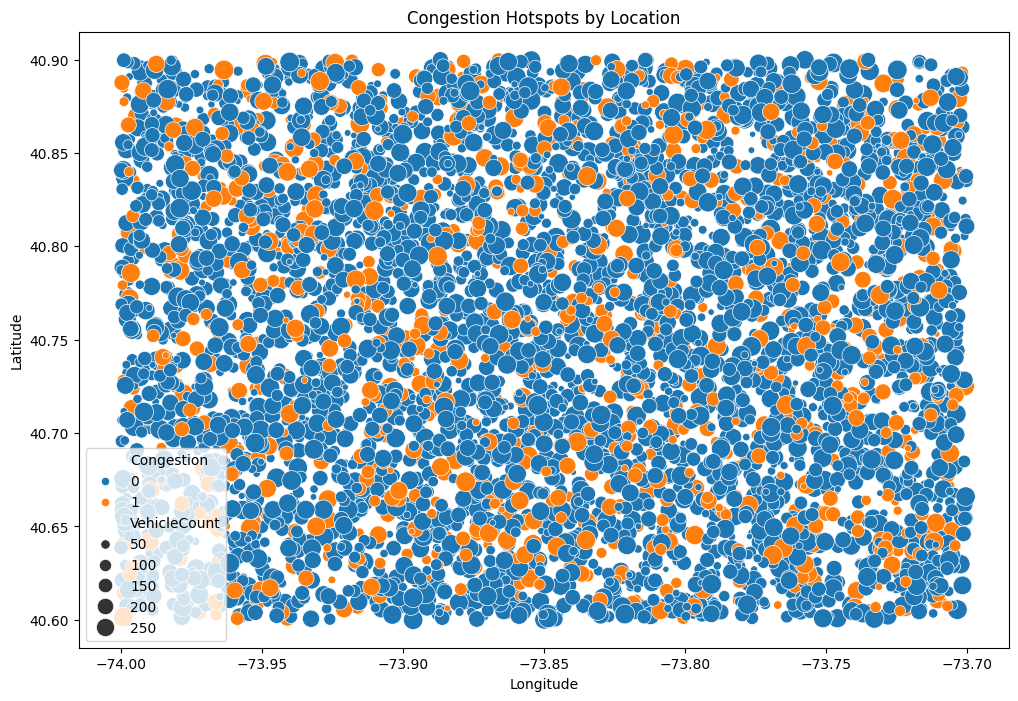

Insight: Areas with high vehicle counts and congestion are potential targets for traffic signal optimization.


In [6]:
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Longitude', y='Latitude', hue='Congestion', size='VehicleCount', sizes=(20, 200), data=df)
    plt.title('Congestion Hotspots by Location')
    plt.show()
    print('Insight: Areas with high vehicle counts and congestion are potential targets for traffic signal optimization.')

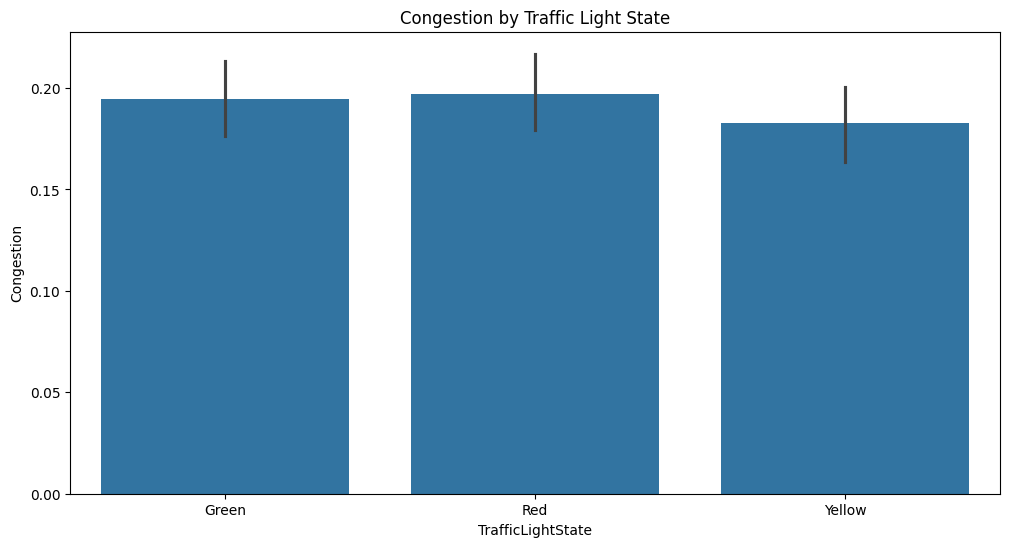

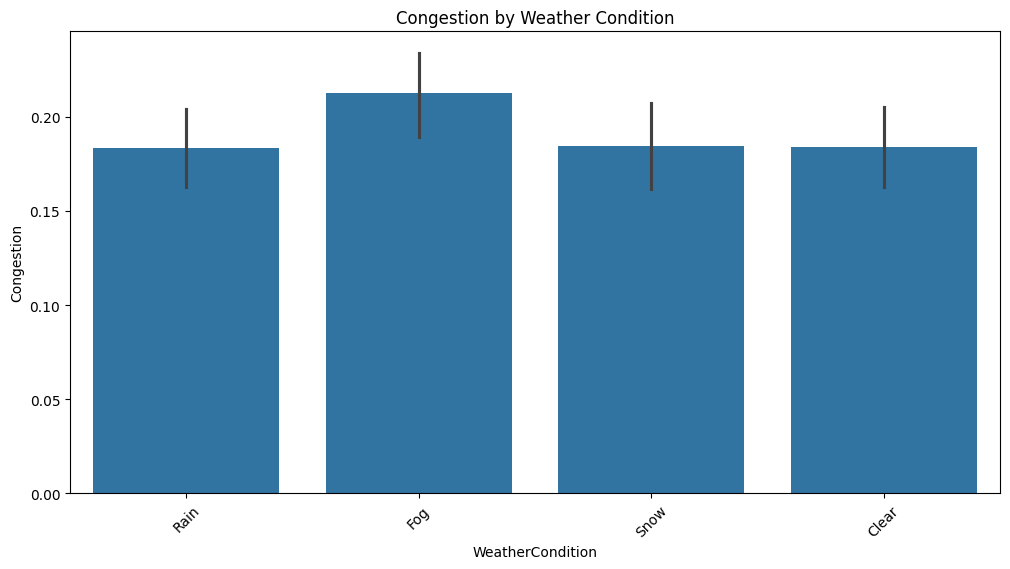

Insight: Congestion is highest when traffic lights are Red and during Fog weather.


In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TrafficLightState', y='Congestion', data=df)
plt.title('Congestion by Traffic Light State')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='WeatherCondition', y='Congestion', data=df)
plt.title('Congestion by Weather Condition')
plt.xticks(rotation=45)
plt.show()
traffic_light_congestion = df.groupby('TrafficLightState')['Congestion'].mean().idxmax()
weather_congestion = df.groupby('WeatherCondition')['Congestion'].mean().idxmax()
print(f'Insight: Congestion is highest when traffic lights are {traffic_light_congestion} and during {weather_congestion} weather.')

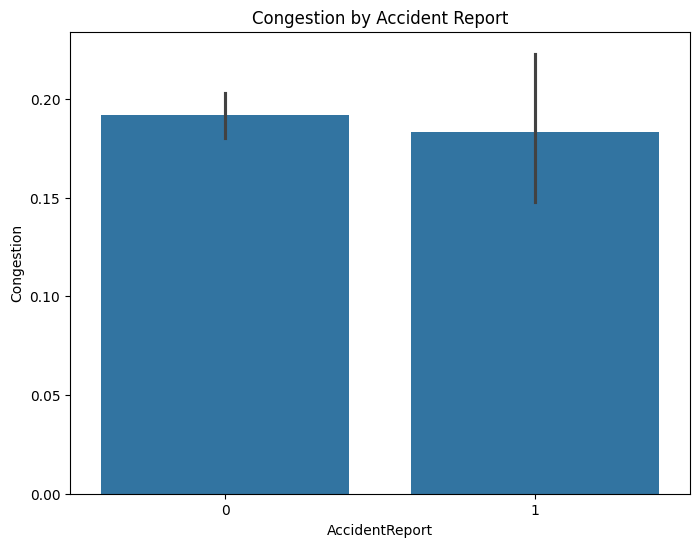

Insight: Congestion is lower when accidents are reported.


In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x='AccidentReport', y='Congestion', data=df)
plt.title('Congestion by Accident Report')
plt.show()
accident_congestion = df.groupby('AccidentReport')['Congestion'].mean()
print('Insight: Congestion is', 'higher' if accident_congestion[1] > accident_congestion[0] else 'lower', 'when accidents are reported.')


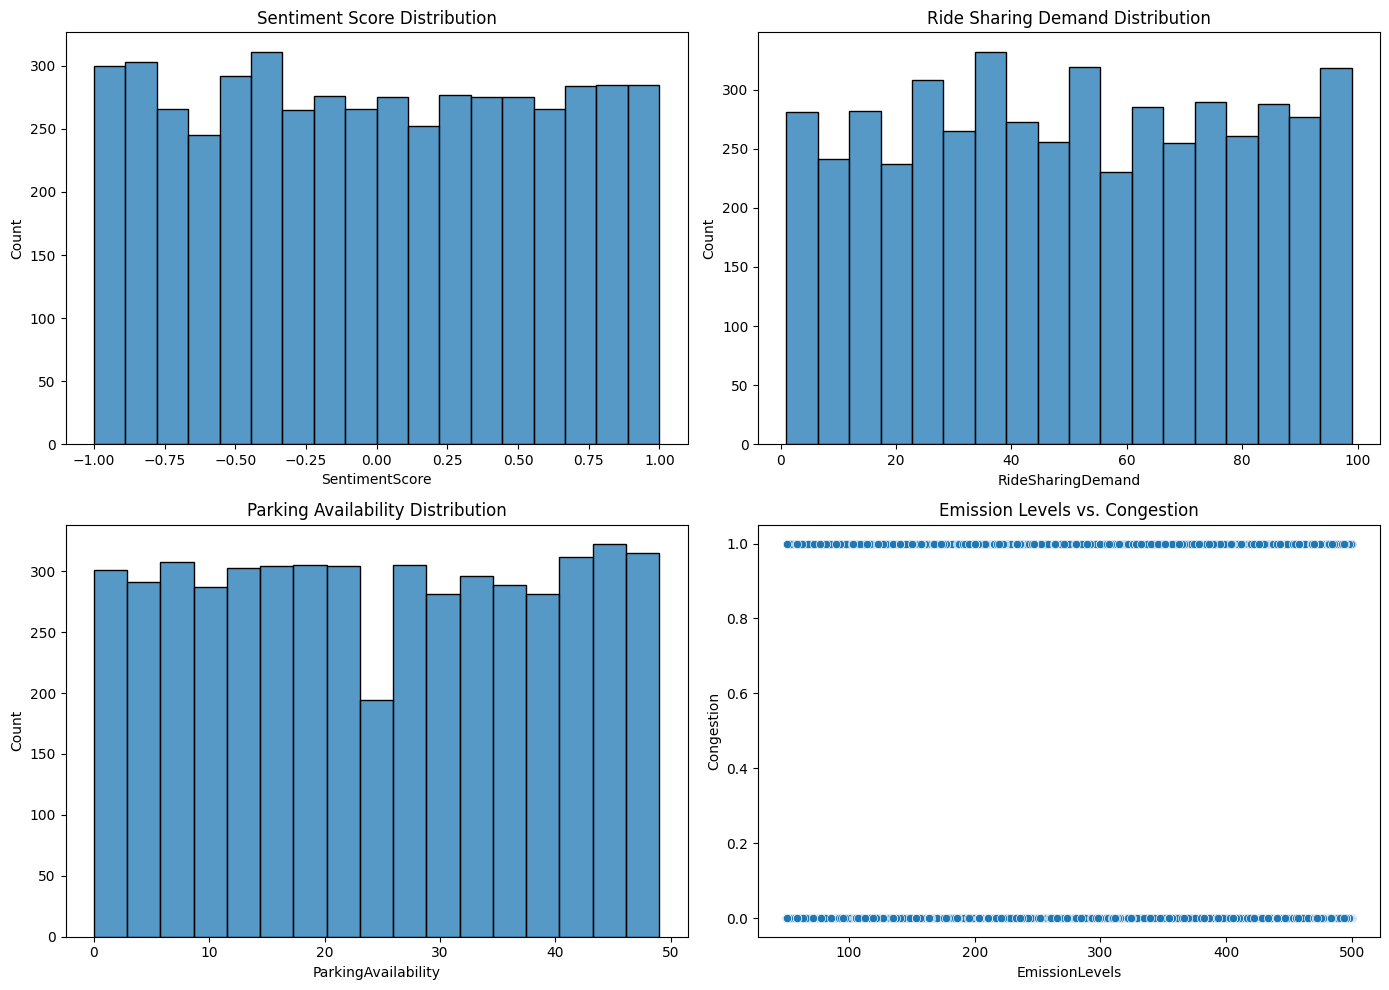

Insight: High emission levels may correlate with congestion, indicating environmental impact of traffic.


In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['SentimentScore'], ax=axes[0, 0])
axes[0, 0].set_title('Sentiment Score Distribution')
sns.histplot(df['RideSharingDemand'], ax=axes[0, 1])
axes[0, 1].set_title('Ride Sharing Demand Distribution')
sns.histplot(df['ParkingAvailability'], ax=axes[1, 0])
axes[1, 0].set_title('Parking Availability Distribution')
sns.scatterplot(x='EmissionLevels', y='Congestion', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Emission Levels vs. Congestion')
plt.tight_layout()
plt.show()
print('Insight: High emission levels may correlate with congestion, indicating environmental impact of traffic.')


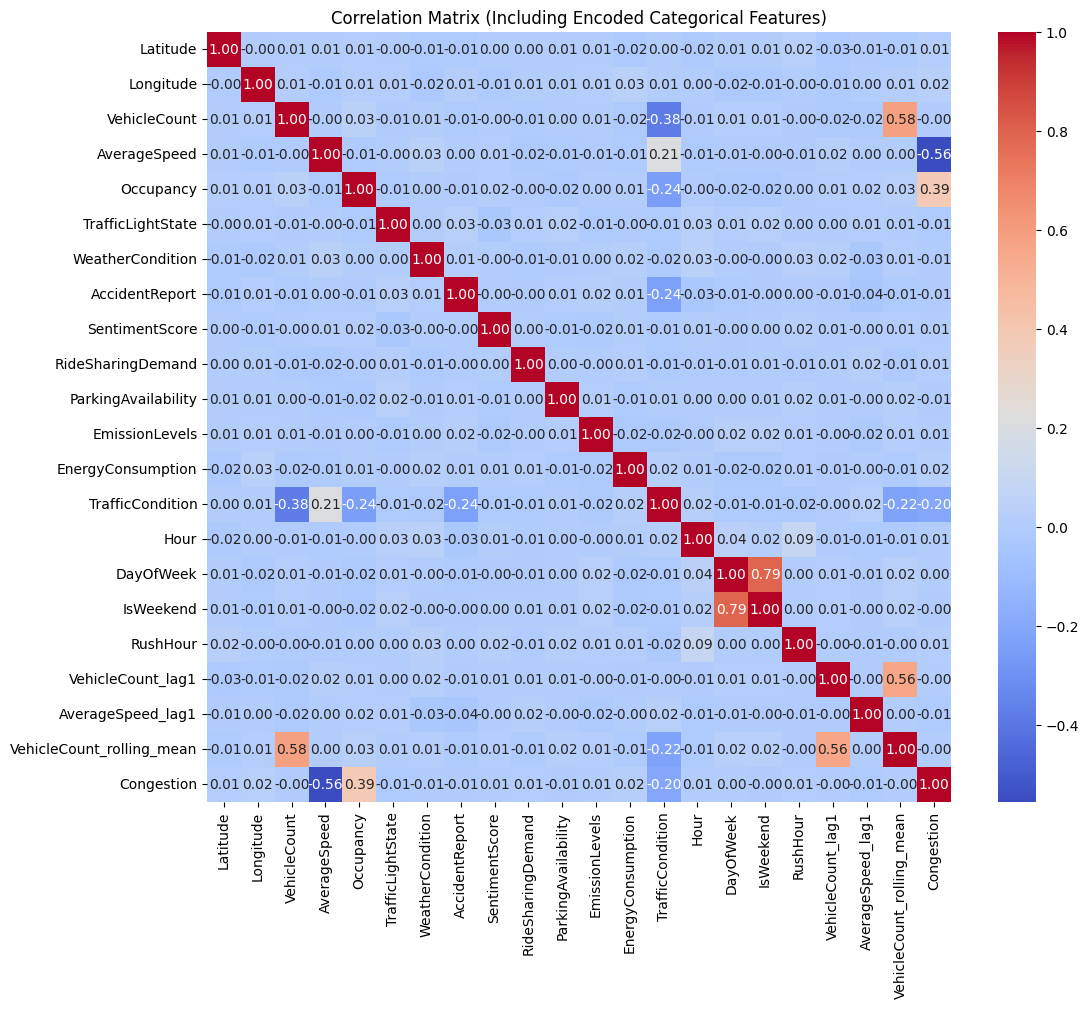

Insight: Top features correlated with congestion: Congestion           1.000000
Occupancy            0.386093
Longitude            0.022000
EnergyConsumption    0.020414
Latitude             0.011591
Name: Congestion, dtype: float64


In [11]:
from sklearn.preprocessing import LabelEncoder


df_encoded = df.copy()


categorical_cols = ['TrafficLightState', 'WeatherCondition', 'TrafficCondition']
for col in categorical_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Including Encoded Categorical Features)')
plt.show()
corr_congestion = df_encoded.corr()['Congestion'].sort_values(ascending=False)
print('Insight: Top features correlated with congestion:', corr_congestion.head(5))